In [1]:
#pip install tensorflow numpy

In [2]:
import os
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\All\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
# Define feature names
feature_names = ['Vessel length', 'Longitude', 'Latitude', 'Distance', 'Speed', 
                 'Destination latitude', 'Destination longitude', 'Remaining distance', 
                 'Lock status', 'Water level', 'Significant wave height', 'Wave period', 
                 'Wind speed', 'Heading-sine', 'Heading-cosine', 'target']

In [6]:
# Reshape X_train, X_val, and X_test to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 15)


In [7]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [8]:
# Define the Bidirectional LSTM model architecture
input_shape = X_train.shape[1:]  # Input shape derived from reshaped X_train

model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l1(0.01))),
    Dropout(0.2),
    Bidirectional(LSTM(50, kernel_regularizer=l1(0.01))),
    Dropout(0.2),
    Dense(1)
])

In [9]:
# Compile the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.009497969456542988),
              loss='mean_squared_error',
              metrics=['mse', rmse, 'mae', 'mape'])

In [10]:
# Early Stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
# Make a dummy prediction to build the model
_ = model.predict(X_train[:1])

1/1 [==============================] - 4s 4s/step


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1, 100)            26400     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 86901 (339.46 KB)
Trainable params: 86901 

In [13]:
# Proceed with model fitting
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 9s 4ms/step - loss: 179691.3438 - mse: 179581.6250 - rmse: 410.1944 - mae: 232.8535 - mape: 1209026432.0000 - val_loss: 111626.7812 - val_mse: 111475.1797 - val_rmse: 325.7475 - val_mae: 191.3951 - val_mape: 941620992.0000
Epoch 2/100
1083/1083 [==============================] - 4s 4ms/step - loss: 95735.7734 - mse: 95554.8750 - rmse: 302.0266 - mae: 176.3156 - mape: 1119575680.0000 - val_loss: 77493.1094 - val_mse: 77288.2891 - val_rmse: 270.4817 - val_mae: 157.4455 - val_mape: 738328704.0000
Epoch 3/100
1083/1083 [==============================] - 4s 4ms/step - loss: 72194.4453 - mse: 71971.0703 - rmse: 261.5917 - mae: 151.8779 - mape: 1015524928.0000 - val_loss: 57654.6406 - val_mse: 57415.1367 - val_rmse: 232.0143 - val_mae: 133.6056 - val_mape: 829670656.0000
Epoch 4/100
1083/1083 [==============================] - 4s 4ms/step - loss: 58920.8516 - mse: 58667.5039 - rmse: 235.3615 - mae: 136.8037 - mape: 1020383360.0000 - val

Epoch 31/100
1083/1083 [==============================] - 4s 4ms/step - loss: 24755.4492 - mse: 24211.2363 - rmse: 148.7638 - mae: 85.7534 - mape: 915378816.0000 - val_loss: 19588.2578 - val_mse: 19040.5000 - val_rmse: 128.9018 - val_mae: 69.3674 - val_mape: 1069785408.0000
Epoch 32/100
1083/1083 [==============================] - 4s 4ms/step - loss: 25069.1152 - mse: 24518.2617 - rmse: 149.5052 - mae: 85.7730 - mape: 913176896.0000 - val_loss: 19837.5898 - val_mse: 19283.4922 - val_rmse: 130.3011 - val_mae: 71.1493 - val_mape: 1061329728.0000
Epoch 33/100
1083/1083 [==============================] - 4s 4ms/step - loss: 24638.1211 - mse: 24080.9258 - rmse: 148.6828 - mae: 85.1518 - mape: 900610688.0000 - val_loss: 19924.4102 - val_mse: 19364.0312 - val_rmse: 130.5074 - val_mae: 70.5057 - val_mape: 1092878592.0000
Epoch 34/100
1083/1083 [==============================] - 4s 4ms/step - loss: 24597.6406 - mse: 24033.7207 - rmse: 148.4193 - mae: 85.2066 - mape: 935566144.0000 - val_loss: 1

Epoch 61/100
1083/1083 [==============================] - 11s 10ms/step - loss: 20738.2422 - mse: 20031.4688 - rmse: 135.1106 - mae: 78.7197 - mape: 953307776.0000 - val_loss: 16877.3516 - val_mse: 16168.2715 - val_rmse: 119.0888 - val_mae: 64.0638 - val_mape: 978458560.0000
Epoch 62/100
1083/1083 [==============================] - 11s 10ms/step - loss: 20613.8418 - mse: 19902.4746 - rmse: 135.0772 - mae: 77.9286 - mape: 1009580032.0000 - val_loss: 16850.2227 - val_mse: 16136.2168 - val_rmse: 118.5796 - val_mae: 63.5594 - val_mape: 981382208.0000
Epoch 63/100
1083/1083 [==============================] - 10s 9ms/step - loss: 20493.3320 - mse: 19777.3047 - rmse: 134.9030 - mae: 78.4447 - mape: 917648320.0000 - val_loss: 15951.1299 - val_mse: 15232.8076 - val_rmse: 115.2977 - val_mae: 61.5529 - val_mape: 1021197632.0000
Epoch 64/100
1083/1083 [==============================] - 9s 8ms/step - loss: 20821.2188 - mse: 20100.5781 - rmse: 135.6071 - mae: 78.6206 - mape: 898806080.0000 - val_los

In [14]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 1s 4ms/step - loss: 16267.5332 - mse: 15544.6953 - rmse: 116.0504 - mae: 62.0441 - mape: 816656896.0000
Test Loss: [16267.533203125, 15544.6953125, 116.05038452148438, 62.04412841796875, 816656896.0]


### Loss Curve

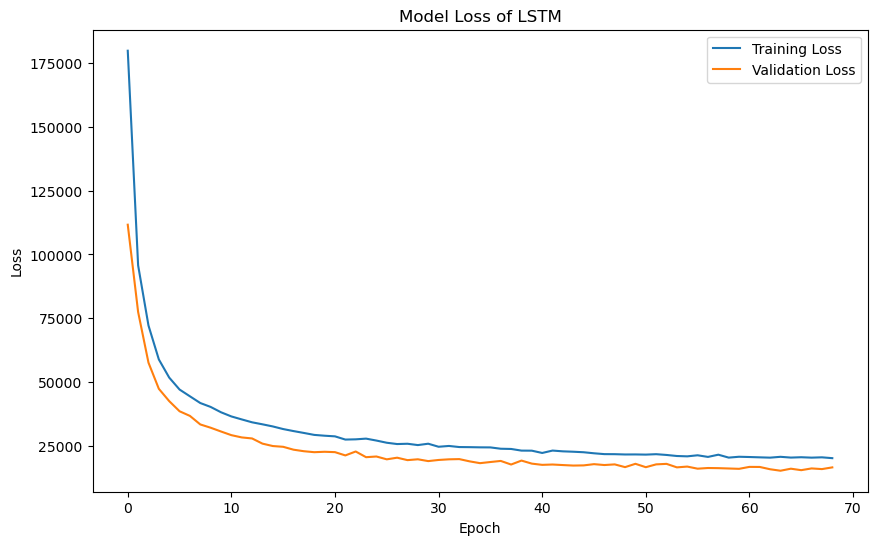

In [15]:
# History is the output of the model.fit() method
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 1s 3ms/step


### Actual vs Predicted Values

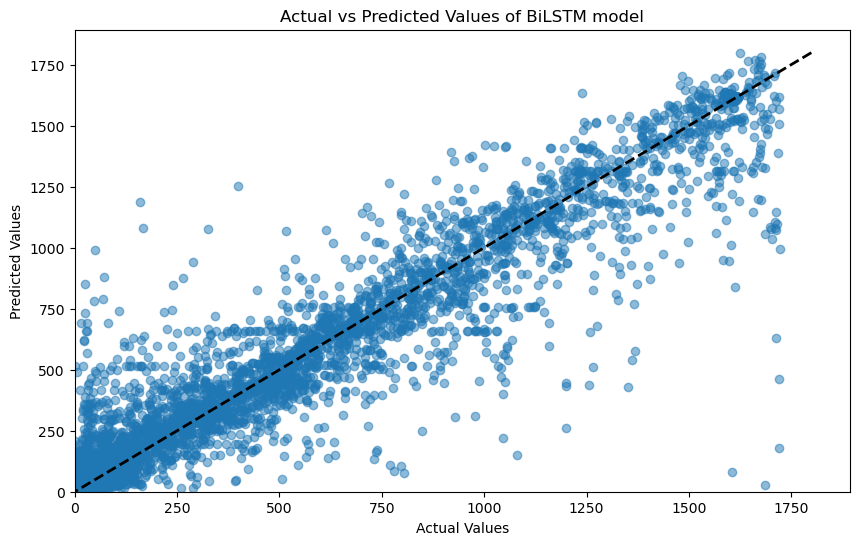

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values of BiLSTM model')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

# Set the limits for x and y axis to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

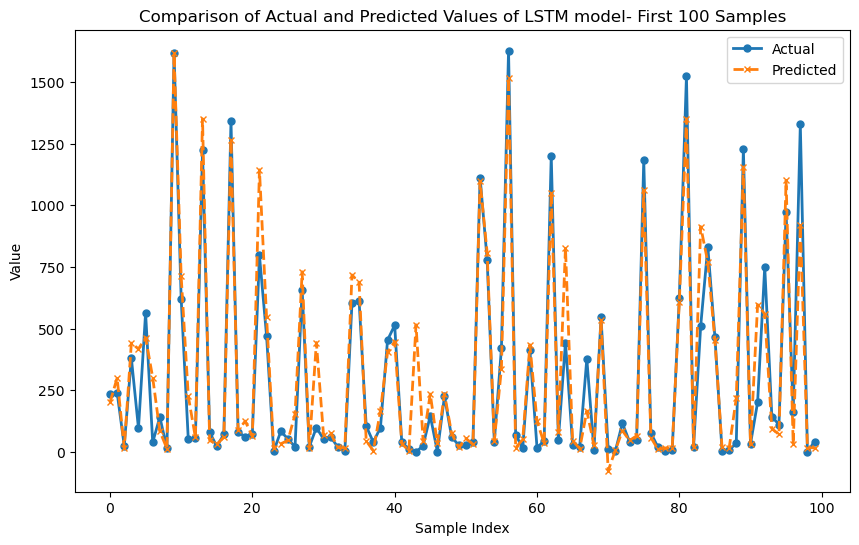

In [18]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values of LSTM model- First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### Error Distribution

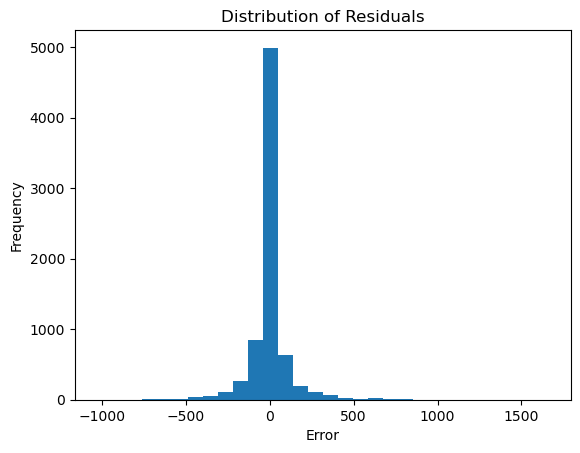

In [19]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [20]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 1s 4ms/step - loss: 16267.5332 - mse: 15544.6953 - rmse: 116.0504 - mae: 62.0441 - mape: 816656896.0000
Test loss (MSE): 16267.533203125
Mean Squared Error (MSE): 15544.6953125
Root Mean Squared Error (RMSE): 116.05038452148438
Mean Absolute Error (MAE): 62.04412841796875
Mean Absolute Percentage Error (MAPE): 816656896.0


In [21]:
# Use a subset of the data to explain to reduce computation time
X_sample = X_test[:]

In [22]:
# Use GradientExplainer for the LSTM model
explainer = shap.GradientExplainer(model, X_train[:])
shap_values = explainer.shap_values(X_sample)

C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [23]:
# Compute the expected value manually
expected_value = np.mean(model.predict(X_train[:]))

1083/1083 [==============================] - 1s 1ms/step


In [24]:
# Convert to DataFrame to include feature names
X_sample_flat = X_sample.reshape(X_sample.shape[0], -1)
X_sample_df = pd.DataFrame(X_sample_flat, columns=feature_names[:-1])  # Exclude the target column

In [25]:
# Flatten the SHAP values if needed
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap_values = np.concatenate([np.array(s).reshape(len(s), -1) for s in shap_values], axis=1)
else:
    shap_values = np.array(shap_values).reshape(len(shap_values), -1)

In [26]:
# Flatten the input sample if needed
#X_sample_flat = X_sample.reshape(X_sample.shape[0], -1)

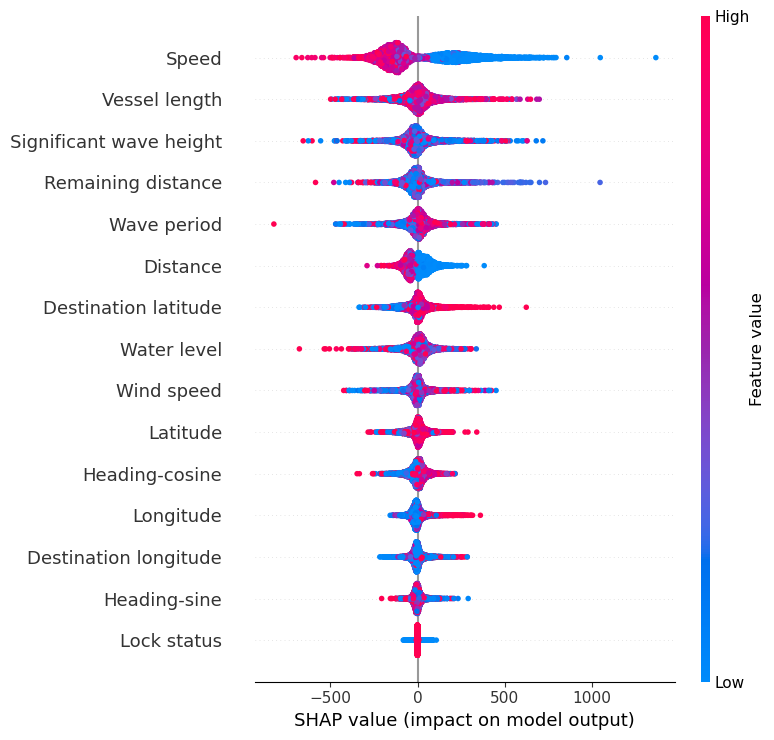

In [27]:
# Summary plot
shap.summary_plot(shap_values, X_sample_df)

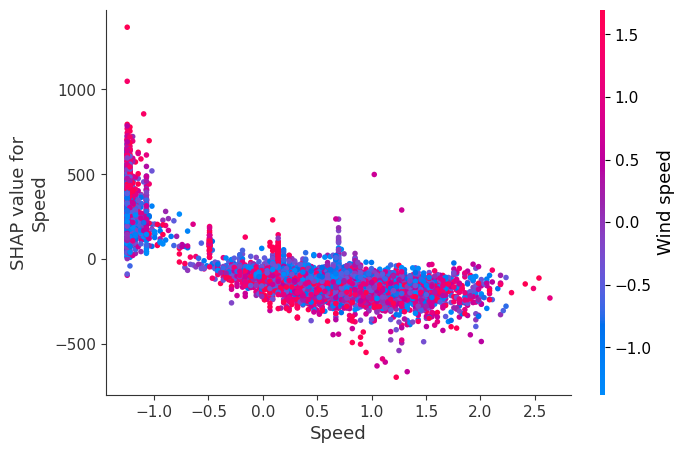

In [28]:
# Dependence plot for a specific feature (e.g., feature 'speed')
shap.dependence_plot('Speed', shap_values, X_sample_df)

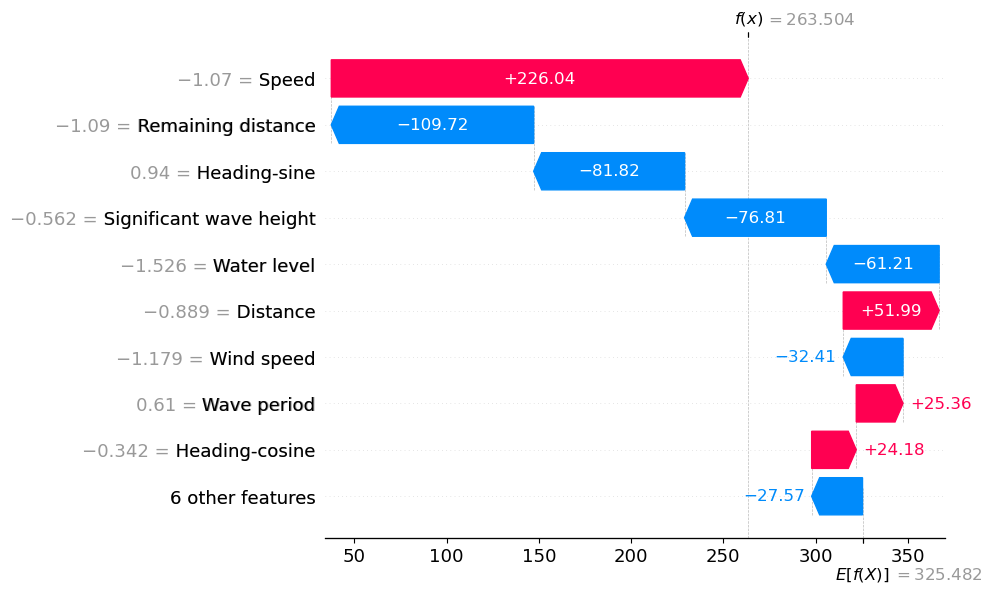

In [29]:
# Waterfall plot for a specific prediction (e.g., index 0)
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=expected_value, data=X_sample_flat[0], feature_names=feature_names[:-1]))

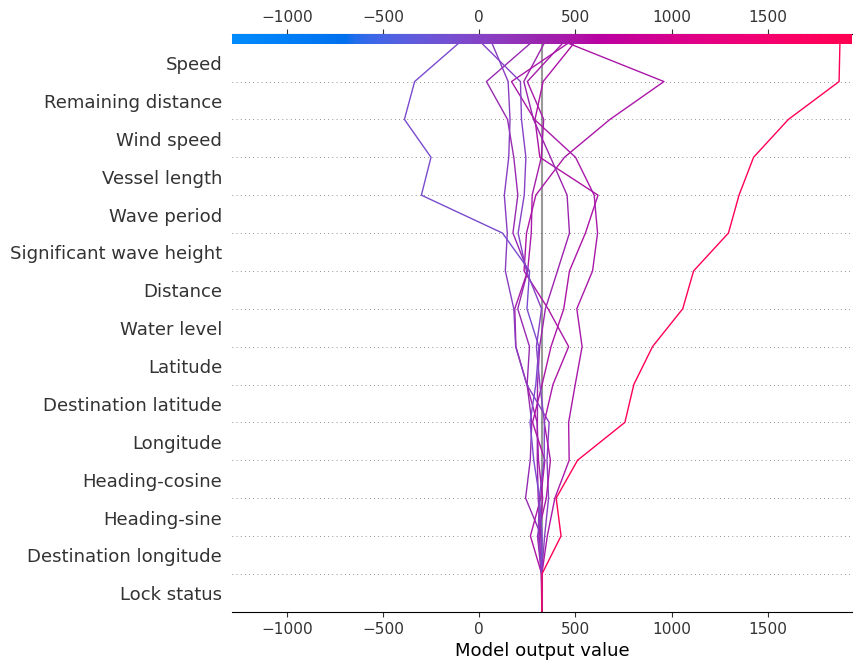

In [30]:
# Decision plot for a subset of predictions
shap.decision_plot(expected_value, shap_values[:10], X_sample_df[:10])

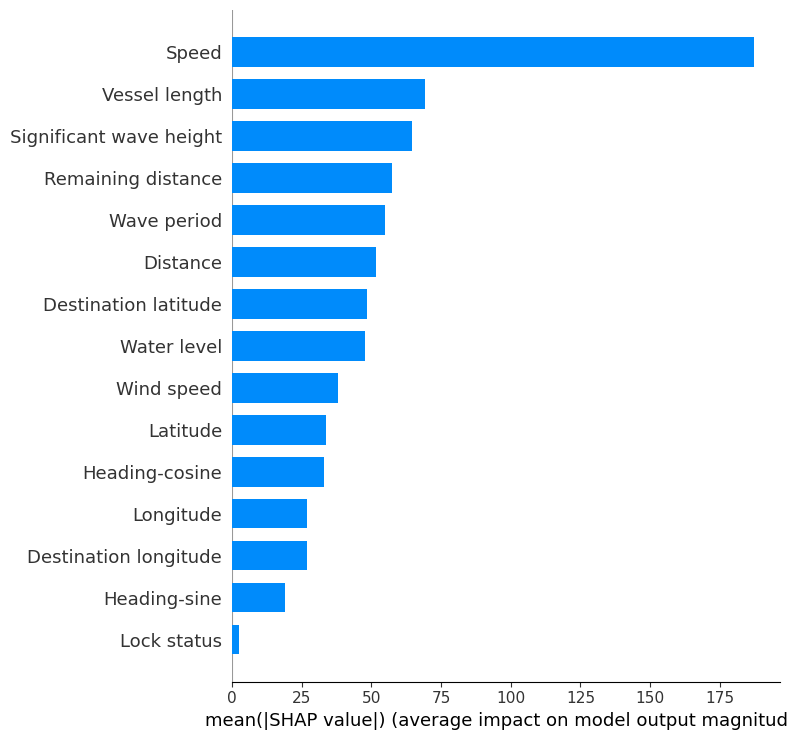

In [31]:
# Bar plot for feature importance
shap.summary_plot(shap_values, X_sample_df, plot_type="bar")

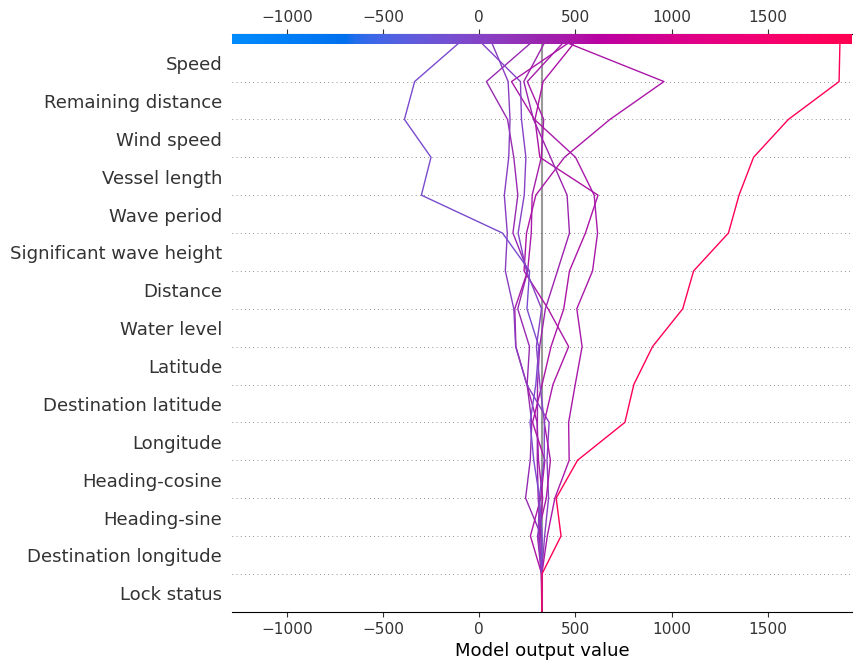

In [32]:
# Decision plot for a subset of predictions
shap.decision_plot(expected_value, shap_values[:10], X_sample_df[:10])

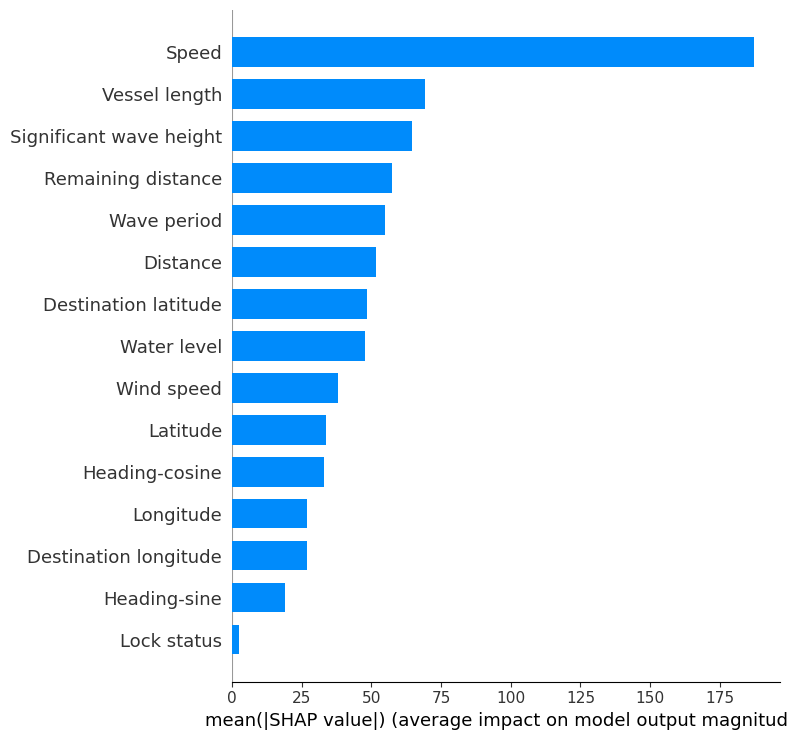

In [33]:
# Bar plot for feature importance
shap.summary_plot(shap_values, X_sample_df, plot_type="bar")

# Hyperparameter Tuning

In [20]:
#pip install keras_tuner

In [21]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [22]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(
        LSTM(
            units=hp.Int('units', min_value=30, max_value=100, step=10), 
            activation='relu'), 
        input_shape=input_shape))
    model.add(Dense(1))
    
    # Hyperparameters for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error',
        metrics=['mse', 'mae', 'mape']
    )

    return model

In [23]:
# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_mse',  # Change to 'val_loss' if you want to minimize loss
    max_trials=10,        # Number of variations to try
    executions_per_trial=3, # Number of models to train for each trial
    directory='my_dir',    # Directory where the results are saved
    project_name='bidirectional_lstm'
)

Reloading Tuner from my_dir\bidirectional_lstm\tuner0.json


In [24]:
# Start search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [25]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best LSTM Units: {best_hps.get('units')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

Best LSTM Units: 60
Best Learning Rate: 0.006013452578991853


In [26]:
tuner.results_summary()

Results summary
Results in my_dir\bidirectional_lstm
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 08 summary
Hyperparameters:
units: 60
learning_rate: 0.006013452578991853
Score: 119712.390625

Trial 06 summary
Hyperparameters:
units: 60
learning_rate: 0.004307157248235197
Score: 129311.86979166667

Trial 00 summary
Hyperparameters:
units: 90
learning_rate: 0.0035249542646559107
Score: 133406.61979166666

Trial 05 summary
Hyperparameters:
units: 70
learning_rate: 0.002830345538814358
Score: 143645.125

Trial 04 summary
Hyperparameters:
units: 70
learning_rate: 0.0010832260345031396
Score: 192605.24479166666

Trial 09 summary
Hyperparameters:
units: 80
learning_rate: 0.0006812898455008083
Score: 211787.50520833334

Trial 03 summary
Hyperparameters:
units: 40
learning_rate: 0.0005472836126493526
Score: 225299.984375

Trial 01 summary
Hyperparameters:
units: 90
learning_rate: 0.0004605666456567159
Score: 225701.58333333334

Trial 02 summary
Hyperparameters:
uni

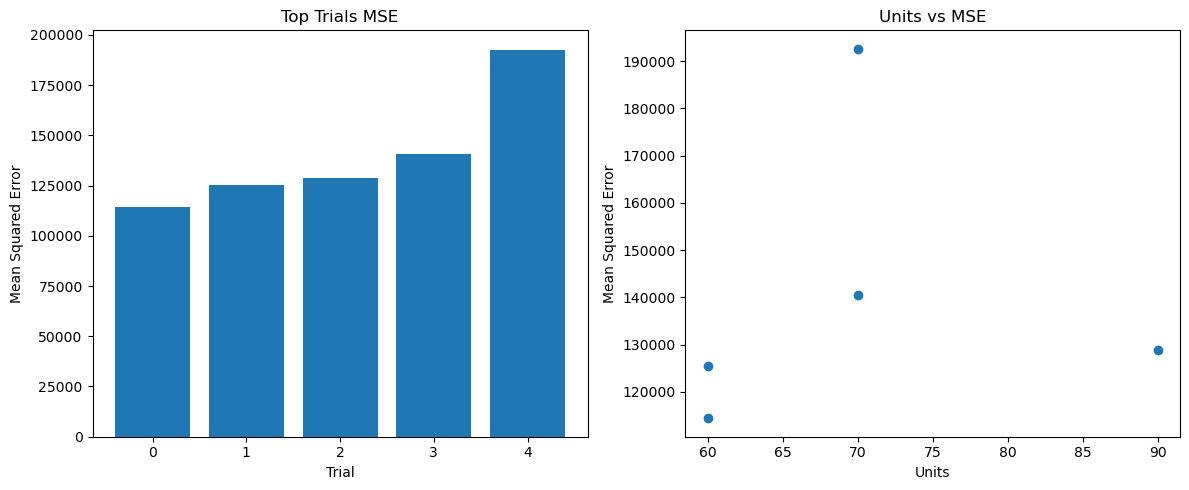

In [27]:
# Get all completed trials as a DataFrame
results_df = tuner.oracle.get_best_trials(num_trials=5)

# Initialize the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting MSE for the top trials
ax[0].set_title('Top Trials MSE')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xlabel('Trial')
ax[0].bar(range(len(results_df)), [trial.metrics.get_best_value('mse') for trial in results_df])

# Plotting hyperparameters (e.g., units) vs MSE
ax[1].set_title('Units vs MSE')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_xlabel('Units')
ax[1].scatter([trial.hyperparameters.values['units'] for trial in results_df], 
              [trial.metrics.get_best_value('mse') for trial in results_df])

plt.tight_layout()
plt.show()